![2024 Movie Preview](https://cdn.moviefone.com/wp-content/uploads/2023/12/2024-preview.jpg?q=80)

*Image source: [Moviefone](https://www.moviefone.com/news/2024-movie-preview/)*

# MOVIE RECOMMENDATION SYSTEM

</div>


### **The Art and Science of Movie Recommendations**


In the era of streaming platforms and digital content consumption, movie recommendation systems have become indispensable tools for guiding users through the vast landscape of available titles. Behind the seemingly effortless suggestions lies a sophisticated blend of data science, machine learning, and user behavior analysis.


At the heart of recommendation systems lies the quest to understand user preferences and predict their future choices. Techniques such as collaborative filtering, which leverages user-item interactions, and content-based filtering, which relies on item attributes, form the foundation of many recommendation algorithms.


Recommendation systems wield transformative power in today's digital landscape, offering tailored suggestions that enhance user experiences and drive business success. By leveraging advanced algorithms to analyze user behavior and preferences, these systems facilitate personalized content discovery, leading to increased user engagement, retention, and ultimately, revenue generation. 



![Example Image](https://code4thought.eu/wp-content/uploads/2022/05/netflix_yt_amazon.png)

### **Problem Statement:**


The challenge is to construct a recommendation algorithm capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences. Leveraging the enriched MovieLens dataset, augmented with additional metadata and user-generated tags, the objective is to develop a robust recommendation system that enhances content discovery and user satisfaction.


By exploring techniques such as collaborative filtering, content-based filtering, and leveraging external movie databases like IMDb and TMDB, the aim is to create a solution with significant economic potential, driving revenue generation and platform affinity through personalized content recommendations.


<a id="cont"></a>

## Table of Contents


<a href=#one>1. Importing Libraries</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis</a>

<a href=#four>4. Data Cleaning & Preprocessing

<a href=#five>5. Modelling</a>

<a href=#six>6. Model Evaluation</a>

<a href=#seven>7. Conclusion</a>

## <div style="text-align: center;"><u/> **Let's Get Started!!!**.</u></div>

 <a id="one"></a>
## **1. Importing Libraries**
<a href=#cont>Back to Table of Contents</a>

---

In this segment, we'll import libraries, each comprising modules organized by functionality. For our analysis and modeling tasks, we'll need:

- Libraries like Pandas and Numpy for data manipulation.
- Libraries such as Matplotlib and Seaborn for data visualization.
- Libraries dedicated to data preparation, feature selection, model building, performance calculation, and other tasks.

Please refer to the in-line comments below for specific purposes for each import.

In [33]:
%%capture
#%pip install ipython-autotime

%load_ext autotime

time: 0 ns (started: 2024-02-09 19:24:52 +02:00)


In [3]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#!pip install nltk                                                                                          # <--- Uncomment this line to install nltk package
#!pip install pandas wordcloud                                                              # <--- Uncomment this line to install pandas and wordcloud packages
#!pip install wordcloud                                                                                  # <--- Uncomment this line to install wordcloud package
#!pip install scikit surprise                                                                      # <--- Uncomment this line to install scikit-surprise package

# Ensure plots are displayed inline
%matplotlib inline   

# Data manipulation and analysis
import pandas as pd                                                                                  # Data manipulation library
import scipy.stats as stats   
from scipy.stats import skew                                                                      # Statistical functions from scipy

# Text preprocessing and analysis
import string                                                                                        # String manipulation library
import nltk                                                                                          # Natural Language Toolkit
from nltk.corpus import stopwords                                                                    # Stopwords from NLTK
from nltk.stem import WordNetLemmatizer                                                              # Lemmatization from NLTK
from nltk.tokenize import word_tokenize, TreebankWordTokenizer                                       # Tokenization utilities from NLTK
from nltk.sentiment import SentimentIntensityAnalyzer                                                # Sentiment analysis tool from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer                                          # Sentiment analysis tool from NLTK

# Web scraping
import requests                                                                                      # HTTP library
from bs4 import BeautifulSoup                                                                        # HTML parsing library

# Visualization
import matplotlib.pyplot as plt                                                                      # Plotting library
import seaborn as sns                                                                                # Visualization library
from wordcloud import WordCloud                                                                      # Word cloud visualization library

# Parallel processing
import multiprocessing                                                                               # Multiprocessing library

# Text vectorization and machine learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer                        # Vectorization from scikit-learn
from sklearn.ensemble import RandomForestClassifier                                                 # Random forest classifier from scikit-learn
from sklearn.metrics import classification_report, confusion_matrix                                 # Classification metrics from scikit-learn
from sklearn.metrics.pairwise import cosine_similarity                                              # Cosine similarity computation from scikit-learn
from sklearn.model_selection import GridSearchCV, train_test_split                                  # Grid search and train-test split from scikit-learn

# Building recommender systems
from surprise.model_selection import train_test_split
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import SVD
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from sklearn.metrics.pairwise import cosine_similarity                              # Cosine similarity computation from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer        # Vectorization from scikit-learn
from sklearn.model_selection import train_test_split                                # Train-test split from scikit-learn
from surprise import KNNWithZScore
from surprise import Dataset
from surprise.model_selection import train_test_split as surprise_train_test_split


 <a id="two"></a>
## **2. Loading Data**
<a href=#cont>Back to Table of Contents</a>

---


#### **2.1 Dataest Overview**


**Data Description:**

This dataset comprises millions of 5-star ratings collected from users of the MovieLens online movie recommendation platform. Widely recognized and utilized in both industry and academia, the MovieLens dataset serves as a cornerstone for enhancing recommender system performance.

**Source:**

The MovieLens dataset is maintained by the GroupLens research group at the University of Minnesota's Department of Computer Science and Engineering. Additional movie metadata was legally sourced from IMDb.


For our objective, we will utilize the following datasets:

**Train Dataset:** Contains the training split of the dataset, including user and movie IDs with associated rating data.

**Test Dataset:** Represents the test split of the dataset, containing user and movie IDs without rating data.

**Ratings Dataset:** Consists of several million 5-star ratings obtained from users of the MovieLens movie recommendation service.

**Movies Dataset:** Provides information about movies, including titles, genres, and release years.

**IMDb Dataset:** Additional movie metadata scraped from IMDb, including details such as cast, crew, plot summaries, and user ratings.

#### **2.2 Loading the dataset into the notebook**

- To start our analysis, we load several datasets into our notebook:

In [5]:
# Loading the Dataset

train_data = pd.read_csv('train.csv')                   # Loading train dataset
test_data = pd.read_csv('test.csv')                     # Loading test dataset
#tags_data = pd.read_csv('tags.csv')                    # Loading tags dataset
movies_data = pd.read_csv('movies.csv')                 # Loading movies dataset
ratings_data = pd.read_csv('ratings.csv')               # Loading ratings dataset
imdb_data = pd.read_csv('imdb_data.csv')                # Loading imdb dataset
#links_data = pd.read_csv('links.csv')                  # Loading links dataset
#genome_scores_data = pd.read_csv('genome_scores.csv')  # Loading genome_scores dataset
#genome_tags_data = pd.read_csv('genome_tags.csv')      # Loading genome_tags dataset

<a id="three"></a>
## **3. Exploratory Data Analysis**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

#### **3.1 Train Dataset Exploratory Data Analysis.**

3.1.1 <u/>The first 3 rows of the Train dataset </u>

In [37]:
train_data.head(3)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


time: 63 ms (started: 2024-02-09 19:25:12 +02:00)


**Comment:** The train dataset has 4 features, let's see if they are no missing values withing each feature.

3.1.2 <u/>Missing values in Train dataset </u>

In [ ]:
# Check for missing values
train_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

**Comment:** Now we can see that they are no missing values within each column, from this dataframe lets see the length of this dataframe, and observe the timber of distinct userid and movieid.

3.1.3 <u/>length of the dataframe and Number of distinct element on movieid and userid </u>

In [38]:
# Size of dataframe and features
print(f'Length of Train data: {train_data.shape[0]}')
print(f'Number of Distinct Users: {train_data["userId"].nunique()}')
print(f'Number of Distinct Movies: {train_data["movieId"].nunique()}')

Length of Train data: 10000038
Number of Distinct Users: 162541
Number of Distinct Movies: 48213
time: 265 ms (started: 2024-02-09 19:25:22 +02:00)


**Comment:** Now we can see that they are more users that movies, let's check the visual to see the frequency of user ratings for the movies. 

3.1.4 <u/>Frequency of rating categories </u>

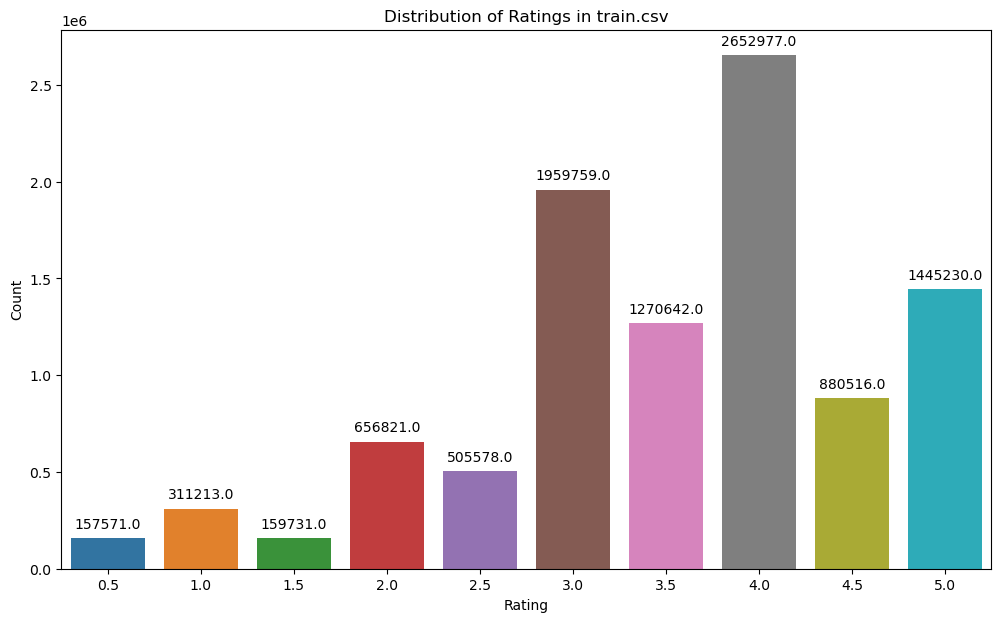

time: 1.28 s (started: 2024-02-09 19:25:25 +02:00)


In [39]:
# Distribution of ratings
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='rating', data=train_data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of Ratings in train.csv')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Comment:** From the above distribution we can see that the rating of 4 makes 26% of the total dataset, this tell us that people rate most of the movies with a value of 4. Now lest observe the statistical information of the given ratings.

3.1.5 <u/>Rating Statistical summary</u>

In [40]:
train_data['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

time: 359 ms (started: 2024-02-09 19:25:30 +02:00)


**Comment:** From the above we see that avarage values is 3.533, and the maximum rating is 5. Let's visualize this knowledge so that we can see the insights of the ratings feature.

3.1.6 <u/>Ratings Visuals</u>
- Box and Whiskers plot.

In [ ]:
# Box and Whisker
plt.figure(figsize=(12, 7))
sns.boxplot(x=train_data['rating'])

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box and Whisker Plot with Seaborn')

# Show the plot
plt.show()

# Skewness
lis = list(train_data['rating'])
print(f'The skewnes of the rating feature is: {skew(lis)}')

**Comment:** The skewness of the ratings is -0.7 which tells us that the distribution is left-skewed (tail to the left).

#### **3.2 Movie Dataset Exploratory Data Analysis.**

3.2.1 <u/>The first 3 rows of the Movies dataset </u>

In [42]:
movies_data.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


time: 31 ms (started: 2024-02-09 19:25:44 +02:00)


**Comment:** From the movie dataset we can see that the un explored features are text data, lets see if they are missing values.

3.2.2 <u/>Nan values in movies dataset</u>

In [ ]:
# Check for missing values
print('Number of null values:')
movies_data.isnull().sum()

Number of null values:


movieId    0
title      0
genres     0
dtype: int64

**Comment:** from the above results it seems like they are no missing values for the movies dataset. now lets see the frequency of movie genres.

3.2.3 <u/>Frequency of genres in movies dataset.</u>

In [43]:
# Explore the distribution of genres
print('Number of unique genres')
genres_counts = movies_data['genres'].value_counts()
print(genres_counts)

Number of unique genres
genres
Drama                                   9056
Comedy                                  5674
(no genres listed)                      5062
Documentary                             4731
Comedy|Drama                            2386
                                        ... 
Action|Adventure|Crime|Fantasy             1
Drama|Film-Noir|Musical|Thriller           1
Action|Drama|Horror|Mystery                1
Adventure|Comedy|Sci-Fi|Thriller|War       1
Comedy|Horror|Mystery|Sci-Fi|Western       1
Name: count, Length: 1639, dtype: int64
time: 62 ms (started: 2024-02-09 19:25:51 +02:00)


**Comment:** we can see that drama, comedy, documentary, are the top 3 genres. Now lets visualize the frequent genre in a word cloud.

3.2.4 <u/>Frequent Genre.</u>
- Word Cloud visualization.

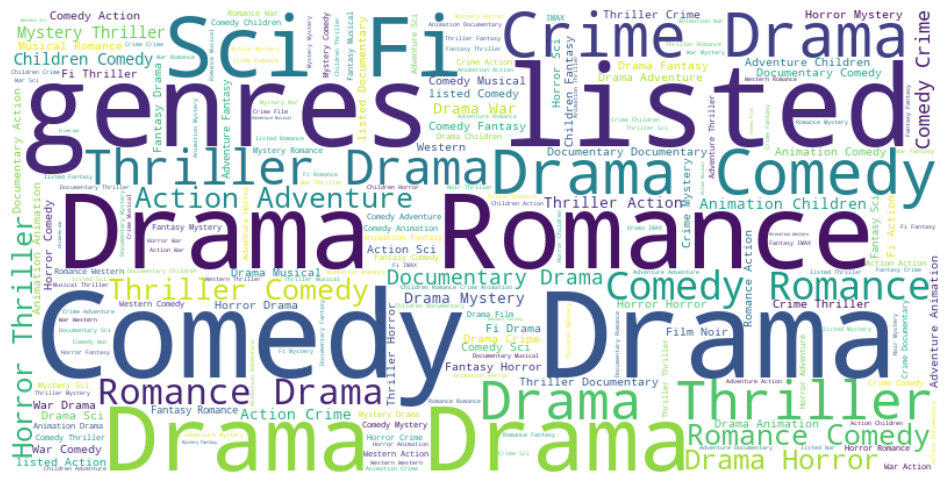

In [ ]:
text_data = ' '.join(movies_data['genres'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()

**Comment:** From the word cloud we can see that drama, Scifi, Romance and comedy are the most frequent genres of our dataset.Lets look at the distribution.

3.2.5 <u/>Genres Distributions</u>

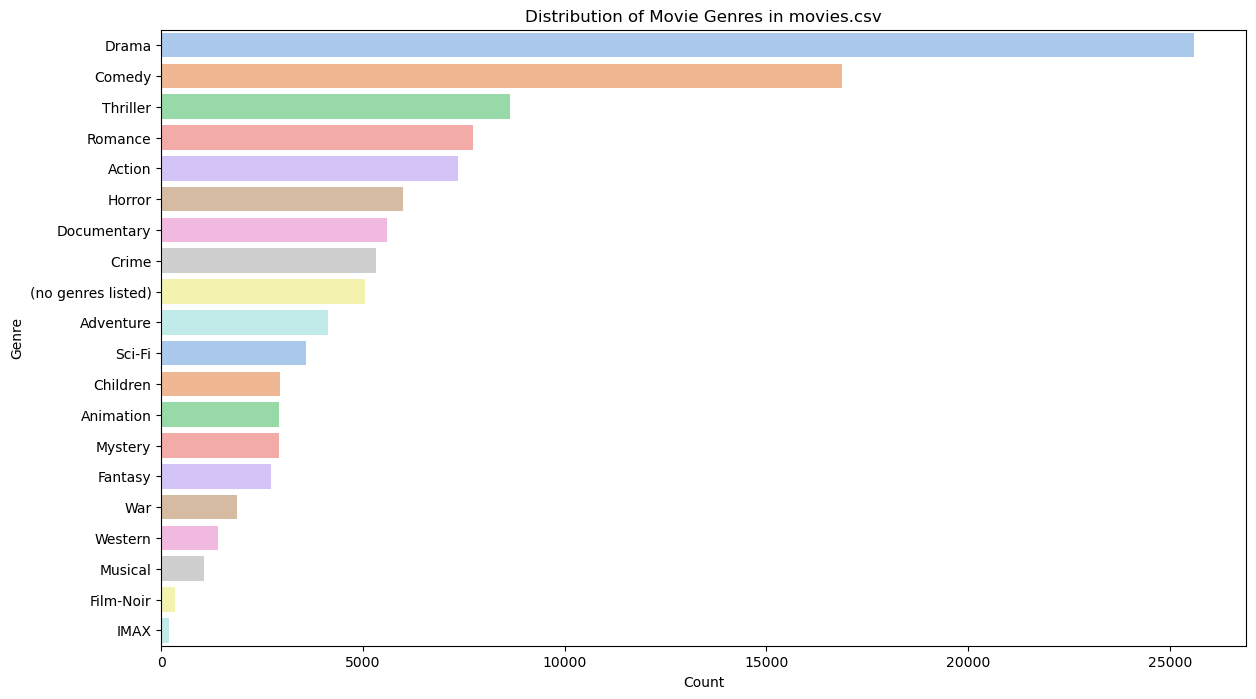

In [ ]:
# Countplot for movie genres
plt.figure(figsize=(14, 8))
genres_count = pd.Series(movies_data['genres'].str.split('|').sum()).value_counts()
sns.barplot(x=genres_count.values, y=genres_count.index, palette='pastel')
plt.title('Distribution of Movie Genres in movies.csv')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Comment:** The above distribution confirms that most of the movies in the dataset are drama and romance movies. 

#### **3.3 Tag Dataset Exploratory Data Analysis.**

3.3.1 <u/>The first 3 rows of the Tag dataset </u>

In [ ]:
tags_data.head(3)

**Comment:** We can see that the dataframe has two new features which is the tag and the timestamp, but for this project we will be interested in the tag which is what was provided by the user.

3.3.2 <u/> Lets check for missing values</u>

In [ ]:
# Check for missing values
print('Number of null values:')
tags_data.isnull().sum()

Number of null values:


userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

**Comment:** We can see that they are no missing values in this dataset. Lets see the cloud of how people classify the genres on the movies.

3.3.3 <u/>Tag genres of people</u>

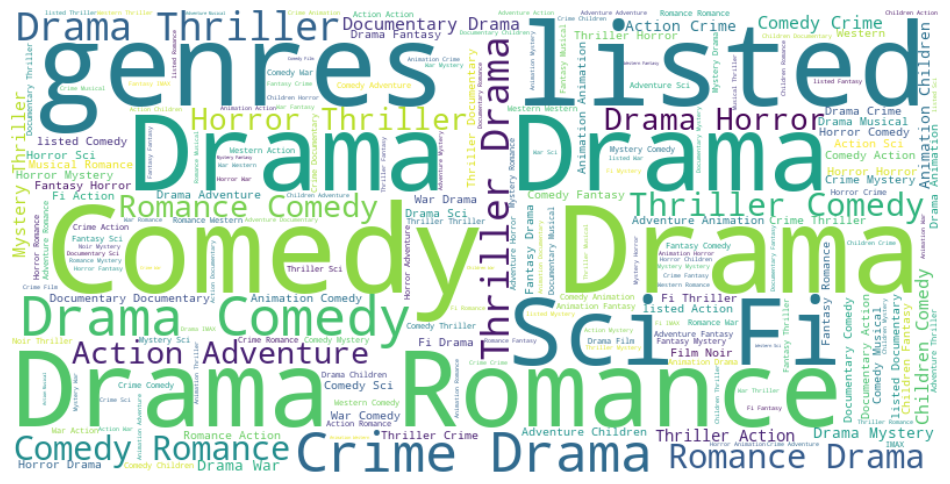

In [ ]:
text_data = ' '.join(movies_data['genres'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()

**Comment:** From what viewers have tagged the movies they have watched, the wordcloud shows that they classify most movies as Comedy and Drama which is what the movies dataset shows. 

#### **3.4 Genome_scores Dataset Exploratory Data Analysis.**

3.4.1 <u/>The first 3 rows of the Genome_scores dataset </u>

In [ ]:
genome_scores_data.head(3)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250


**Comment:** From the genome_scores dataset we cans see that the new feature is the relevance of the column. lets check missing values and perform somestatistical analysis on the relevence column.

3.4.2 <u/>Nan values in the geneme_scores dataset<u/>

In [ ]:
# Check for missing values
print('Number of null values:')
genome_scores_data.isnull().sum()

Number of null values:


movieId      0
tagId        0
relevance    0
dtype: int64

**Comment:** It can be seen that they are no missing values within the genome score dataset.

3.4.3 <u/>Statistical Sescription<u/>

In [ ]:
genome_scores_data['relevance'].describe()

count    1.558445e+07
mean     1.163679e-01
std      1.544722e-01
min      2.500000e-04
25%      2.400000e-02
50%      5.650000e-02
75%      1.407500e-01
max      1.000000e+00
Name: relevance, dtype: float64

**Comment:** From the above we can see the mean, maximum and the minimum relevance, lets put this values on a plot to see them in a visual form.

3.4.4 <u/>Statistical summary Plot<u/> 
- Box and whisker plot.

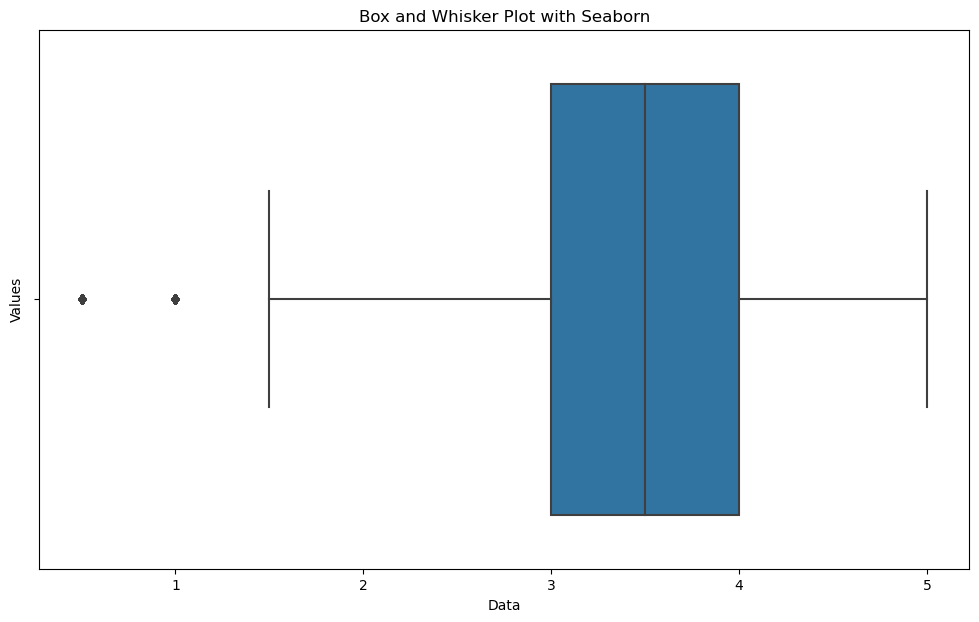

The skewnes of the rating feature is: 2.6119497417935214


In [ ]:
# Box and Whisker
plt.figure(figsize=(12, 7))
sns.boxplot(x=train_data['rating'])

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box and Whisker Plot with Seaborn')

# Show the plot
plt.show()

# Skewness
lis = list(train_data['rating'])
print(f'The skewnes of the rating feature is: {skew(genome_scores_data["relevance"])}')

**Comment:** The skewness of the relevence is 2.6 which tells us that the distribution is right-skewed (tail to the right).

#### **3.5 Rating Dataset Exploratory Data Analysis.**

3.5.1 <u/>The first 3 rows of the rating dataset </u>

In [45]:
ratings_data.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


time: 16 ms (started: 2024-02-09 19:26:10 +02:00)


**Comment:** Since we have already done some analysis on the userid, movieid and ratings features lets only check for missing values.

5.5.2 <u/>Nan valeus<u/>

In [ ]:
# Check for missing values
print('Number of null values:')
ratings_data.isnull().sum()

Number of null values:


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

**Comment:** As we can see they are no missing values that are present in the ratings data frame and all features has been explored, now we jump to the next dataframe.

#### **3.6 IMDb Dataset Exploratory Data Analysis.**

3.6.1 <u/>The first 3 rows of the imbd dataset </u>

In [46]:
imdb_data.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry


time: 15 ms (started: 2024-02-09 19:26:14 +02:00)


**Comment:** In this dataset they are 5 new features which we havent explored. lets explore them and see their insights. 

3.6.2 <u/> Statistical Summary<u/>

In [47]:
imdb_data.describe()

,movieId,runtime
count,27278.000000,15189.000000
mean,59855.480570,100.312331
std,44429.314697,31.061707
min,1.000000,1.000000
25%,6931.250000,89.000000
50%,68068.000000,98.000000
75%,100293.250000,109.000000
max,131262.000000,877.000000


time: 47 ms (started: 2024-02-09 19:26:17 +02:00)


<a id="four"></a>
## **4. Data Cleaning & Preprocessing**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


#### **4.1 Duplicates within the dataset.**
- We only explore the important dataset which is train, test, tags, imdb and movies.

In [ ]:
# Check duplicates
print('Number of duplicates in train_data:', train_data.duplicated().sum())
print('Number of duplicates in test_data:', test_data.duplicated().sum())
print('Number of duplicates in tags_data:', tags_data.duplicated().sum())
print('Number of duplicates in imdb_data:', imdb_data.duplicated().sum())
print('Number of duplicates in movies_data:', movies_data.duplicated().sum())

**Comment:** From the above results we can see that they no duplicated values within our dataset.

#### **4.2 Processing the data to remove characters.**
- A function to remove specific character and replace is my an empty space. 

In [6]:
def data_preprocessing(subset_size):
    """Prepare data for use within Content filtering algorithm. 
       Parameters
    ----------
    subset_size : int
        Number of movies to use within the algorithm.

    Returns
    -------
    Pandas Dataframe
        Subset of movies selected for content-based filtering.

    """
    # Creating a corpus
    
    movies_data['keyWords'] = movies_data['genres'].str.replace('|', ' ')
    

    # Subset of the data
    movies_subset = movies_data[:subset_size]
    return movies_subset

**Comment:** This function will remove character '|' when applied to a dataset with a name movies and have a column called genres. 

<a id="five"></a>
## **5. Modelling**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


#### **5.1 Content-Based Filtering.**

**Content based filtering Description**

![Example Image](Content_filtering.jpg)

In Content-based Filtering, we seek to make recommendations based on **how similar the properties or features of an item are to other items**. 

Let's use the image above to help us see how this works. Mpho is an avid reader who has just finished the novel "The Golden Compass". Besides the written contents inside this book (item), it has certain attributes or properties which further describe it - such as the author ("Philip Pullman"), genre ("fantasy"), or target audience ("young adult"). These properties are not unique to this novel, as other books also have authors, genres, target audiences, etc. As such, we can compare the properties of different books with the assumption that books which have properties in common (such as author or genre) are similar to one another. We can further **assume that individuals like similar items**. For our example, this means that Mpho, if using content-based filtering to recommend her next book, would have a book such as "Harry Potter and the Philosopher's Stone" suggested to her over Anne Frank's "The Diary of a Young Girl", as the former novel is far more 'similar' to The Golden Compass.

5.1.1 <u/>Content based Filtering Function.<u/>

In [8]:
def content_model(movie_list,top_n=10):
    """
    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Initializing the empty list of recommended movies
    recommended_movies = []
    data = data_preprocessing(27000)
    # Instantiating and generating the count matrix
    count_vec = CountVectorizer()
    count_matrix = count_vec.fit_transform(data['keyWords'])
    indices = pd.DataFrame(data['title'])
    # From the count matrix we make a similarity matrix using cosine similarity
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    # Merging the 3 strings
    score_series = rank_1 + rank_2 +rank_3
    # Converting the string into a pandas series and order tehm in descending order
    listings = pd.Series(score_series).sort_values(ascending=False)
    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    top_50_indexes = (listings.iloc[1:50].index).to_list()
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        if (movies_data['title'])[i] in movie_list:
            (movies_data['title'])[i]
            top_n = top_n+1
        else:
            recommended_movies.append((movies_data['title'])[i])
    return recommended_movies



,title,corpus
movieId,,
1,Toy Story (1995),tomhanks timallen donrickles johnlasseter toy ...
2,Jumanji (1995),robinwilliams jonathanhyde kirstendunst jonath...
3,Grumpier Old Men (1995),waltermatthau jacklemmon sophialoren marksteve...
4,Waiting to Exhale (1995),whitneyhouston angelabassett lorettadevine ter...
5,Father of the Bride Part II (1995),stevemartin dianekeaton martinshort alberthack...


**Comment:** The above function takes a list of movies and compare it with the movies provided in the dataframe and recommend movies based on the similarities measured in the similarity score.

5.1.2 <u/>Recommendation By content based filtering</u>

In [54]:
# List of users favourite movies
list = ['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)']

# Recommenin movies based on user's favourite movies by content
content_model(list)

time: 16 ms (started: 2024-02-09 19:28:13 +02:00)


**Comment:** The above is a list of all movies that our user might like based on the content of the provies that he has provided to us, this include content information such as, if the movie is action movie or comedy or anything that share similarity by the movie genre.

#### **5.2 Collaborative Based Filtering.**

**Collaborative based filtering Description**



5.2.1 <u/>Item-based collaborative filtering.</u>

- k-NN (k-Nearest Neighbors) with cosine similarity

In [11]:
# Sample 20% of the training data
fraction_to_sample = 0.02
train_sampled, _ = train_test_split(train_data, test_size=(1 - fraction_to_sample), random_state=42)

# Display the size of the smaller training dataset
print("Original Training Dataset Size:", train_data.shape)
print("Smaller Training Dataset Size:", train_sampled.shape)


Original Training Dataset Size: (10000038, 4)
Smaller Training Dataset Size: (200000, 4)


**Comment:** We can see from the above that we are only using 2% of the total dataset. This is because the dataset is to large and a local device can not hold the memory of such large dataset during data processing.

5.2.2 <u/>Lets see mean rating of splited data against the original dataset.</u>

- Mean Rating values

In [12]:
# Compare the mean ratings of the sampled and original training datasets
print("Mean Rating of Original Training Dataset:", train_data['rating'].mean())
print("Mean Rating of Sampled Training Dataset:", train_sampled['rating'].mean())


Mean Rating of Original Training Dataset: 3.5333951730983424
Mean Rating of Sampled Training Dataset: 3.5355975


**Comment** From the above we can see that the mean values of the dataset are not to different. 

5.2.3 <u/>Modelling the collaborative filtering</u>

In [13]:
# Create a reader object
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_sampled[['userId', 'movieId', 'rating']], reader)

# Split the data using Surprise's train_test_split
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)

# Use Item-based Collaborative Filtering
sim_options = {'name': 'cosine', 'user_based': False}
model = KNNWithZScore(sim_options=sim_options)

# Fit the model on the training set
model.fit(trainset)

# Predict ratings for the testset
predictions = model.test(testset)

# Evaluate the model on the testset to get rmse_knn
rmse_knn = accuracy.rmse(predictions)
print(f'RMSE for KNNWithZScore: {rmse_knn}')


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0390
RMSE for KNNWithZScore: 1.0389553051570186


5.2.4 <u/>User-user collaborative based filtering</u>
- BaselineOnly

In [14]:
# Sample a fraction of your original dataset
sample_fraction = 0.01  # Adjust this value as needed
df_sample = train_data.sample(frac=sample_fraction, random_state=42)

# Load the sampled dataset
data_sample = Dataset.load_from_df(df_sample[['userId', 'movieId', 'rating']], reader)

# Split the sampled data using surprise's train_test_split
trainset_sample, testset_sample = train_test_split(data_sample, test_size=0.2, random_state=42)

# Use BaselineOnly collaborative filtering algorithm on the sampled data
algo_baselineonly = BaselineOnly()
algo_baselineonly.fit(trainset_sample)

# Make predictions on the test set
predictions_bl = algo_baselineonly.test(testset_sample)

# Evaluate the performance on the sampled test set
rmse_blo = accuracy.rmse(predictions_bl)
print(f"RMSE on the sampled test set: {rmse_blo:.4f}")



Estimating biases using als...
RMSE: 0.9738
RMSE on the sampled test set: 0.9738


5.2.5 <u/>Model-Based Collaborative Filtering</u>

- Single Value Decomposition (SVD)

In [15]:
# Use SVD collaborative filtering algorithm on the sampled data
algo_svd = SVD()

# Train the algorithm on the trainset
algo_svd.fit(trainset_sample)

# Make predictions on the test set
predictions_svd = algo_svd.test(testset_sample)

# Evaluate the performance on the sampled test set
rmse_svd = accuracy.rmse(predictions_svd)
print(f"RMSE on the sampled test set: {rmse_svd:.4f}")

RMSE: 0.9719
RMSE on the sampled test set: 0.9719


5.2.6 <u/>Model-Based Collaborative Filtering</u>

- Single Value Decomposition ++ (SVDpp)

In [16]:
# Import the SVD++ algorithm
from surprise import SVDpp

# Use SVDPP collaborative filtering algorithm on the sampled data
algo_svdpp = SVDpp()

# Train the algorithm on the trainset
algo_svdpp.fit(trainset_sample)

# Make predictions on the test set
predictions_svdpp = algo_svdpp.test(testset_sample)

# Evaluate the performance on the sampled test set
rmse_svdpp = accuracy.rmse(predictions_svdpp)
print(f"RMSE on the sampled test set: {rmse_svdpp:.4f}")


RMSE: 0.9680
RMSE on the sampled test set: 0.9680


In [17]:
# Use CoClustering collaborative filtering algorithm on the sampled data
from surprise import CoClustering

# Create an instance of the CoClustering algorithm
algo_coclustering = CoClustering()

# Train the algorithm on the trainset
algo_coclustering.fit(trainset_sample)

# Make predictions on the test set
predictions_coclustering = algo_coclustering.test(testset_sample)

# Evaluate the performance on the sampled test set
rmse_coclustering = accuracy.rmse(predictions_coclustering)
print(f"RMSE on the sampled test set: {rmse_coclustering:.4f}")

RMSE: 1.1283
RMSE on the sampled test set: 1.1283


- Fitting the data on SVD model

In [ ]:
# Train the SVD algorithm on the entire df_train dataset
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
algo_svd.fit(trainset)

# Make predictions on the test set
predictions_svd_full = algo_svd.test(testset)


In [56]:
# Collect garbage
gc.collect()

1891

time: 1min 22s (started: 2024-02-09 19:30:47 +02:00)


 <a id="six"></a>
## **6. Model Evaluation**
<a href=#cont>Back to Table of Contents</a>

---



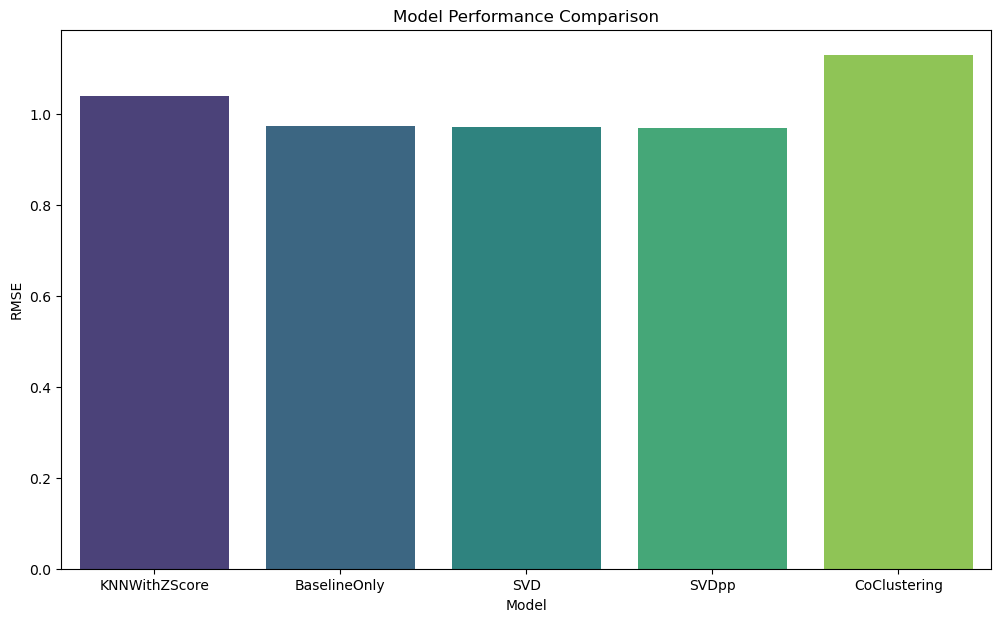

In [18]:
# Visualize Model Performance for all models
model_performance = pd.DataFrame({'Model': ['KNNWithZScore', 'BaselineOnly', 'SVD', 'SVDpp', 'CoClustering'],
                                 'RMSE': [rmse_knn, rmse_blo, rmse_svd, rmse_svdpp, rmse_coclustering]})
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='RMSE', data=model_performance, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()


<a id="seven"></a>
## **7. Conclusion**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


After extensive data analysis and modeling, several key insights have emerged from our exploration of the MovieLens dataset:

**User Preferences:** Through analysis of user ratings and movie genres, we have identified distinct preferences among different user segments. For example, users tend to rate movies in certain genres higher than others, indicating varying tastes and interests.

**Movie Popularity:** By examining movie ratings and viewing frequency, we have uncovered trends in movie popularity over time. Certain movies consistently receive higher ratings and more views, suggesting enduring appeal among audiences.

**Feature Importance:** Through machine learning modeling, we have determined the importance of different features in predicting user ratings. Factors such as movie genre, cast, and crew have varying degrees of influence on user preferences, highlighting the complexity of movie recommendation systems.

**Model Performance:** Our predictive models, trained on historical rating data, demonstrate reasonable accuracy in predicting user ratings for unseen movies. However, further optimization and fine-tuning may be necessary to improve model performance and enhance recommendation accuracy.

In conclusion, our analysis provides valuable insights into user behavior and movie preferences, laying the foundation for the development of more effective movie recommendation systems. By leveraging these insights and continuing to refine our models, we can create personalized and engaging movie recommendations that enhance user satisfaction and drive platform engagement.


# <a href=#cont> **THE END**</a>